#**Python para DS - Introducción al lenguaje**


# **Analisis de Estadisticas Descriptivas**

In [49]:
import pandas as pd
notas = pd.read_csv('/content/ratings.csv')

In [50]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [51]:
notas.shape

(100836, 4)

### "shape" me devuelve la estructura de mi conjunto de datos

In [52]:
notas.columns=["usuarioId", "peliculaId", "nota", "momento"]

In [53]:
notas.head()

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [54]:
notas.head(10)

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [55]:
notas["nota"]

,nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0
...,...
100831,4.0
100832,5.0
100833,5.0
100834,5.0


**.unique** devuelve valores unicos

In [56]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

**value_counts** contabiliza cuantas veces se repite cada valor


In [57]:
notas["nota"].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [58]:
notas["nota"].mean()
#devuelve el valor promedio

3.501556983616962

# **Visualización de los datos**

<Axes: >

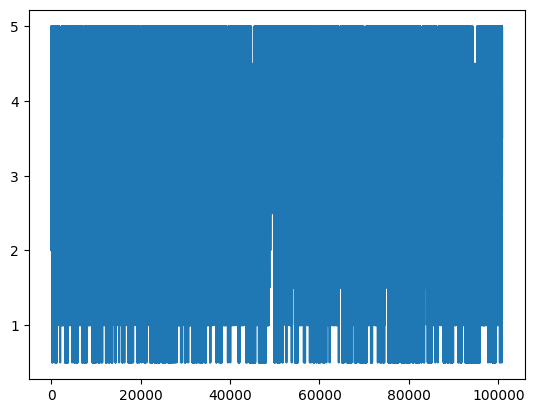

In [59]:
notas.nota.plot()

<Axes: ylabel='Frequency'>

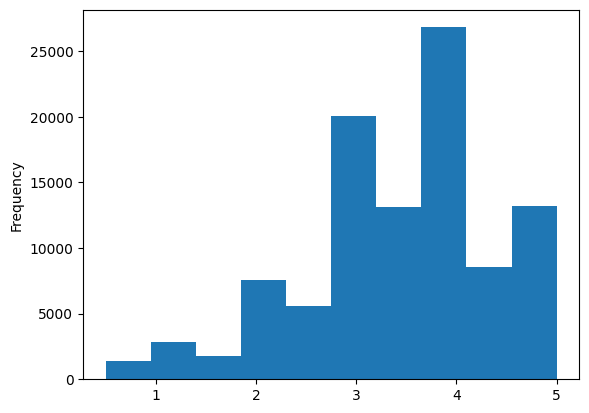

In [60]:
notas["nota"].plot(kind="hist")

In [61]:
print("promedio=", notas["nota"].mean())
print("mediana=", notas["nota"].median())

promedio= 3.501556983616962
mediana= 3.5


In [62]:
notas.nota.describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='nota'>

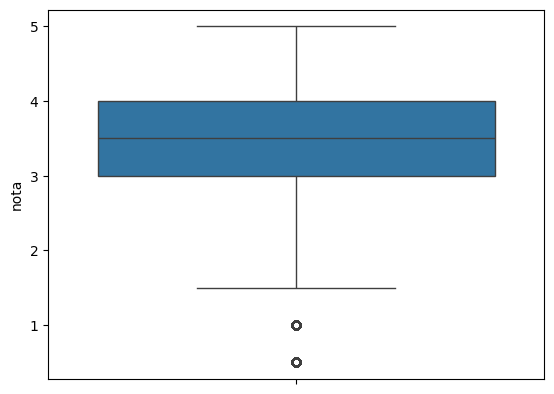

In [63]:
import seaborn as sns
sns.boxplot(notas.nota)

# **Analizando algunas notas especificas por película**

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
peliculas = pd.read_csv('/content/movies.csv')
print(notas.head(5))


   usuarioId  peliculaId  nota    momento
0          1           1   4.0  964982703
1          1           3   4.0  964981247
2          1           6   4.0  964982224
3          1          47   5.0  964983815
4          1          50   5.0  964982931


In [66]:
peliculas.columns=["peliculaId", "titulo", "genero"]
print(peliculas.head(5))

   peliculaId                              titulo  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   

                                        genero  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [67]:
notas.query('peliculaId==1')
#Devuelve todos los registros de notas que tienen como Id el número 1

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [68]:
notas.query('peliculaId==1').nota.mean()

3.9209302325581397

In [69]:
notas.query('peliculaId==1').nota.describe()


,nota
count,215.000000
mean,3.920930
std,0.834859
min,0.500000
25%,3.500000
50%,4.000000
75%,4.500000
max,5.000000


In [70]:
notas.groupby('peliculaId')

In [71]:
notas.groupby('peliculaId').mean().nota
# Se obtienen todos los promedios de cada una de las peliculas

,nota
peliculaId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [72]:
# cargamos el promedio de peliculas a una variable
promedios_por_peliculas = notas.groupby('peliculaId').mean().nota
promedios_por_peliculas.head()

,nota
peliculaId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

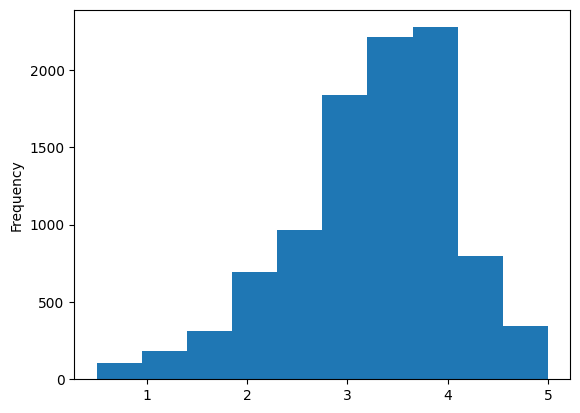

In [73]:
#Distribucion de promedios
promedios_por_peliculas.plot(kind="hist")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='nota'>

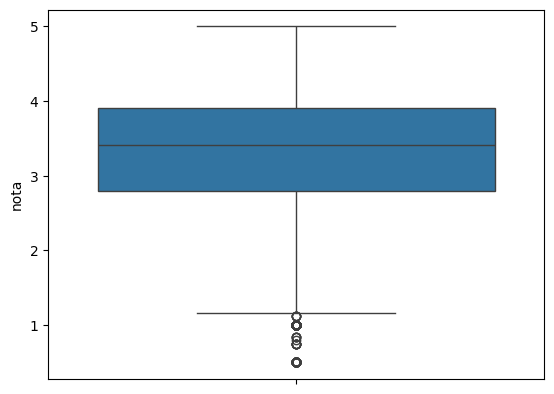

In [74]:
import seaborn as sns
sns.boxplot(promedios_por_peliculas)

In [75]:
promedios_por_peliculas.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


<ipython-input-76-a2f2a2ebe275>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(promedios_por_peliculas)


<Axes: xlabel='nota', ylabel='Density'>

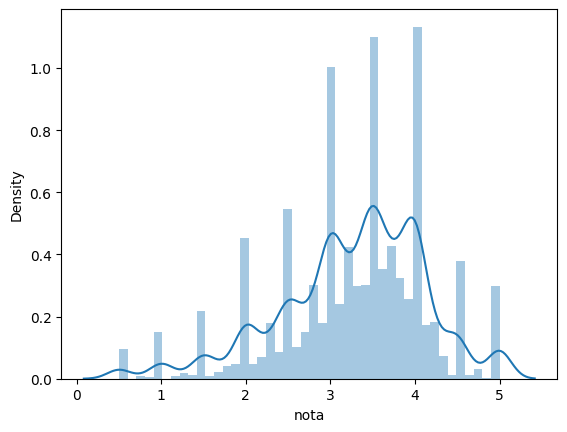

In [76]:
sns.distplot(promedios_por_peliculas)

<ipython-input-77-36b66014902b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(promedios_por_peliculas, bins =10)


<Axes: xlabel='nota', ylabel='Density'>

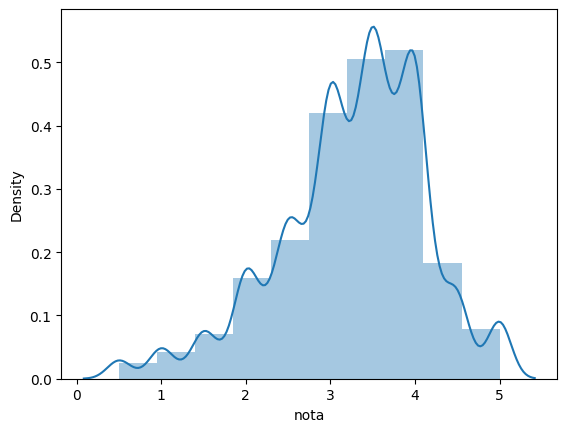

In [77]:
sns.distplot(promedios_por_peliculas, bins =10)
# con el parametro bins se genera el nuumero de intervalos deseados que para este caso es 10

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

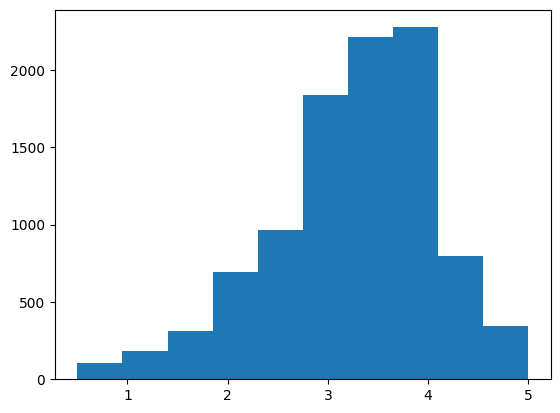

In [78]:
# matploltib
import matplotlib.pyplot as plt
plt.hist(promedios_por_peliculas, bins = 10)
# Es el mismo grafico de pandas pero con la libreria de matploltib

<function matplotlib.pyplot.show(close=None, block=None)>

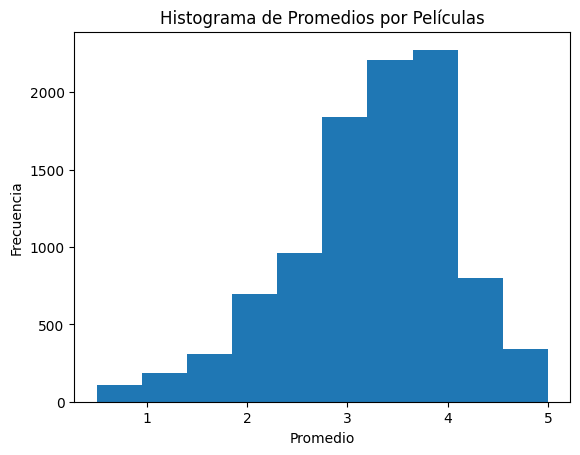

In [79]:
# Agregamos titulos al gráfico
plt.hist(promedios_por_peliculas)
plt.title('Histograma de Promedios por Películas')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='nota'>

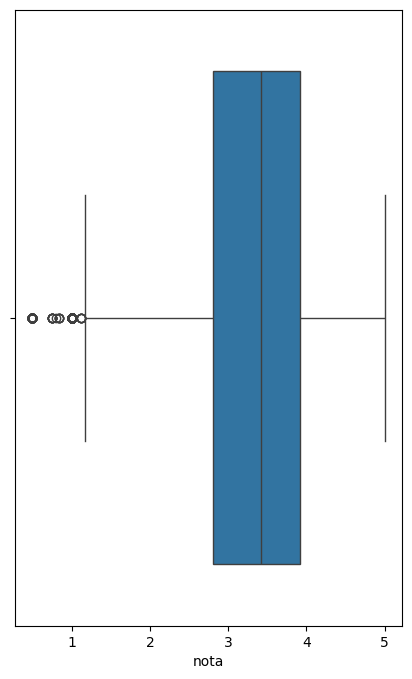

In [80]:
# Podemos definir el eje x o y para rotar el gráfico
plt.figure(figsize=(5,8)) # Define tamaño horizontal y vertical
sns.boxplot(x= promedios_por_peliculas)

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tmdb = pd.read_csv('/content/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [83]:
tmdb.original_language

,original_language
0,en
1,en
2,en
3,en
4,en
...,...
4798,es
4799,en
4800,en
4801,en


In [84]:
tmdb.original_language.unique()
# Me Devuelve todos los idioma que pertenecen a ese conjunto de datos, ES una clasificación categorica

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [85]:
# Categorico ordinal, se ordendan los datos y se tiene un orden de grandeza. Es decir, se tiene que cumplir en primer lugar la primaria despues  la secundaria y despues la universida
# budget --> cuantitativa continua
# Número de votos --> cuantitativa de intervalo
#3, 5 votos
# el intervalo es constante
#Notas --> 0,5 5 0,5 2,7 --> la variable nota es una variable cuantitativa por intervalo
# Es importante conocer los tipos de datos para realizar los analisis

In [86]:
tmdb.original_language.value_counts() # se obtiene cada idioma en las que fue grabada cada pelicula y su cantidad

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [87]:
# Transformados la serie en una dataframe con .to_frame()
tmdb.original_language.value_counts().to_frame()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [88]:

# reseteamos el indice con .reset_index()  con lo anterior se crea una nueva columna llamada index
tmdb.original_language.value_counts().to_frame().reset_index()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [89]:
contador_idiomas = tmdb.original_language.value_counts().to_frame().reset_index()
contador_idiomas.columns = ['odioma_original', 'total']
contador_idiomas.head()

,odioma_original,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='odioma_original', ylabel='total'>

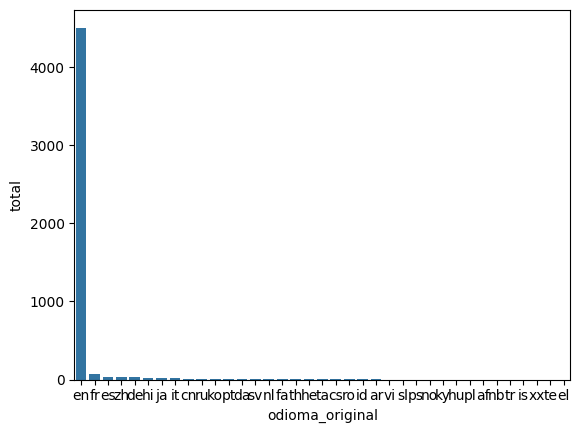

In [90]:
sns.barplot(x='odioma_original', y='total', data=contador_idiomas)

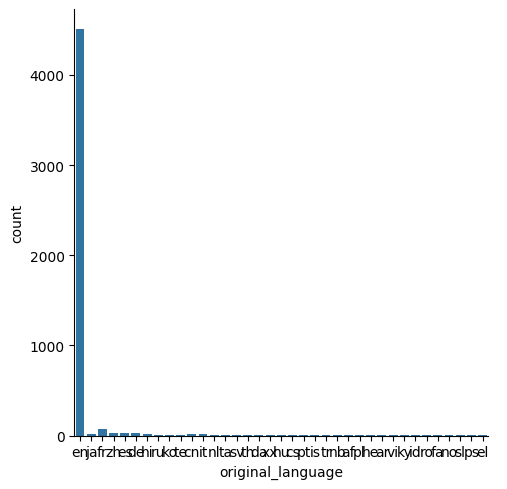

In [91]:
sns.catplot(x='original_language', kind='count', data=tmdb)

In [92]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7cbf9ce2f340>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

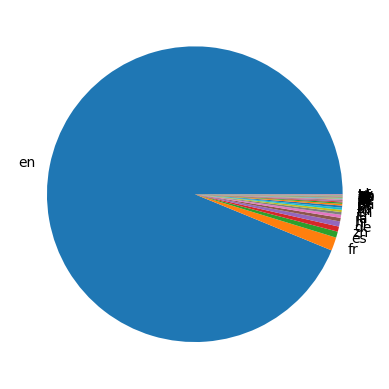

In [93]:
plt.pie(contador_idiomas['total'], labels=contador_idiomas['odioma_original'])
# ESte gráfico no es recomendado cuando se tiene muchas variables

In [94]:
total_por_idioma = tmdb.original_language.value_counts()
total_general = total_por_idioma.sum()
total_ingles = total_por_idioma.loc['en'] # Localiza la categoria en ingles
total_diferencial = total_general - total_ingles
print(total_general)
print(total_ingles)
print(total_diferencial)

4803
4505
298


In [95]:
datos = {
    'idioma': ['Ingles', 'otros'],
    'total': [total_ingles, total_diferencial]
}

In [96]:
datos =pd.DataFrame(datos)
datos

,idioma,total
0,Ingles,4505
1,otros,298


<Axes: xlabel='idioma', ylabel='total'>

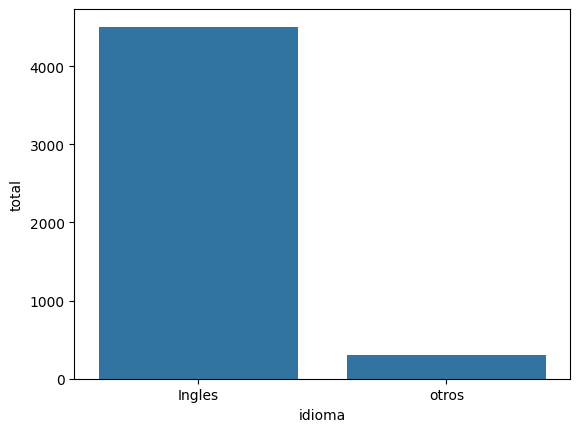

In [97]:
sns.barplot(x='idioma', y='total', data=datos)
# Este gráfico es más facil de explicar visualmente que los anteriores, debido a la grandeza del idioma ingles

In [98]:
tmdb.query('original_language != "en"').original_language.value_counts()
# Se filtran los registros que No estan en ingles y me crea una serie con los otros idiomas

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


In [99]:
tmdb.query('original_language == "en"').original_language.value_counts()
# Se filtran los registros que estan en ingles y me crea una serie con el idoma ingles

,count
original_language,
en,4505


In [100]:
peliculas_sin_idoma_ingles = tmdb.query('original_language != "en"').original_language.value_counts()

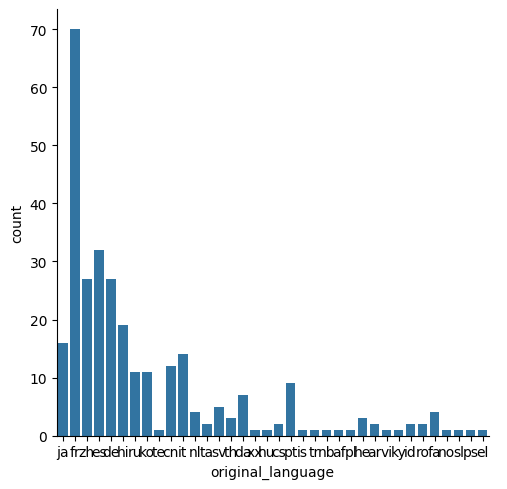

In [101]:
sns.catplot(x='original_language', kind='count', data=tmdb.query('original_language != "en"'))

<Figure size 500x800 with 0 Axes>

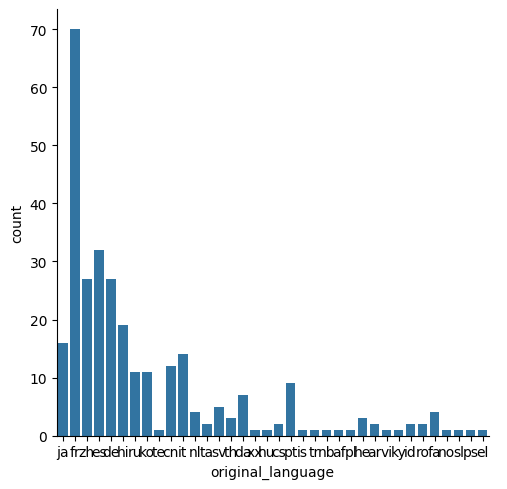

In [102]:
# Se configura el gráfico
plt.figure(figsize=(5,8))
sns.catplot(x='original_language', kind='count', data=tmdb.query('original_language != "en"'))

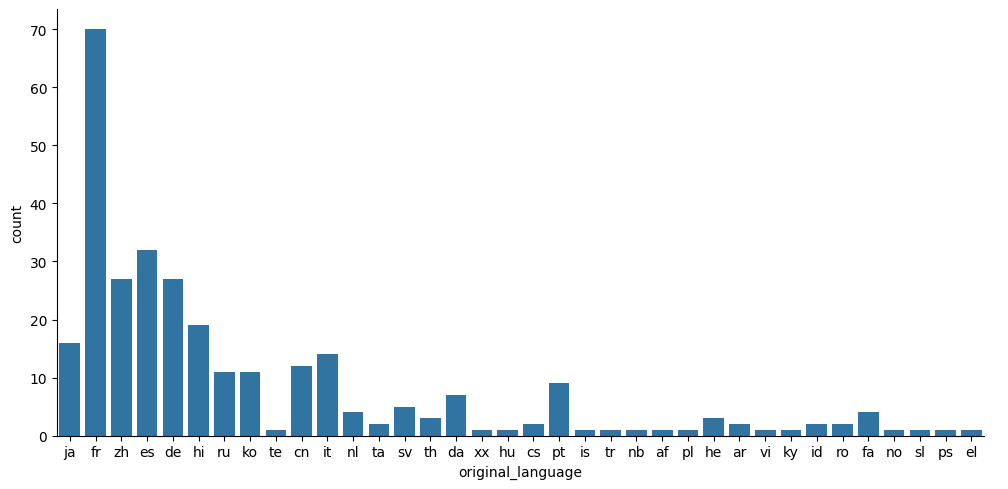

In [103]:
sns.catplot(x='original_language', kind='count', data=tmdb.query('original_language != "en"'), aspect=2)

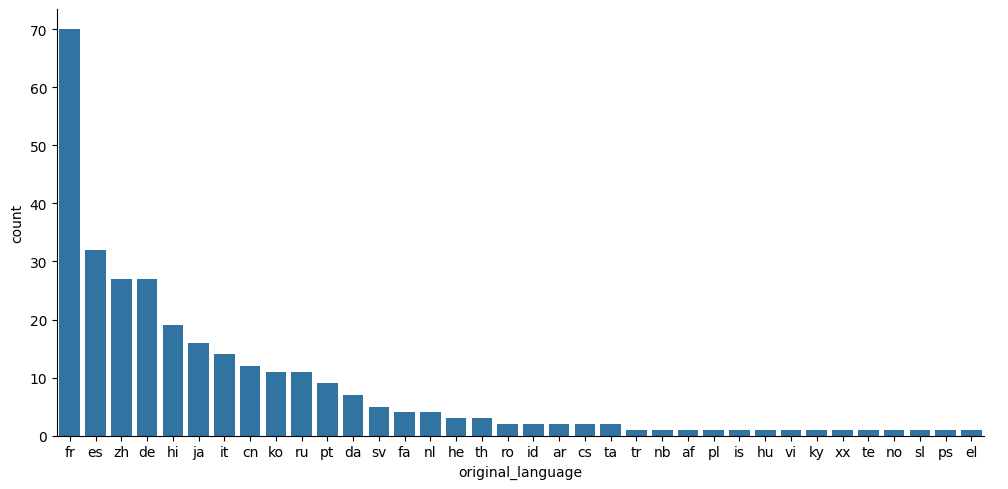

In [104]:
Total_idiomas_otras_peliculas =tmdb.query('original_language != "en"').original_language.value_counts()
sns.catplot(x='original_language', kind='count', data=tmdb.query('original_language != "en"'), aspect=2, order=Total_idiomas_otras_peliculas.index)

<ipython-input-105-836eca79c6aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='original_language', kind='count', data=tmdb.query('original_language != "en"'), aspect=2, order=Total_idiomas_otras_peliculas.index, palette='flare')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/u

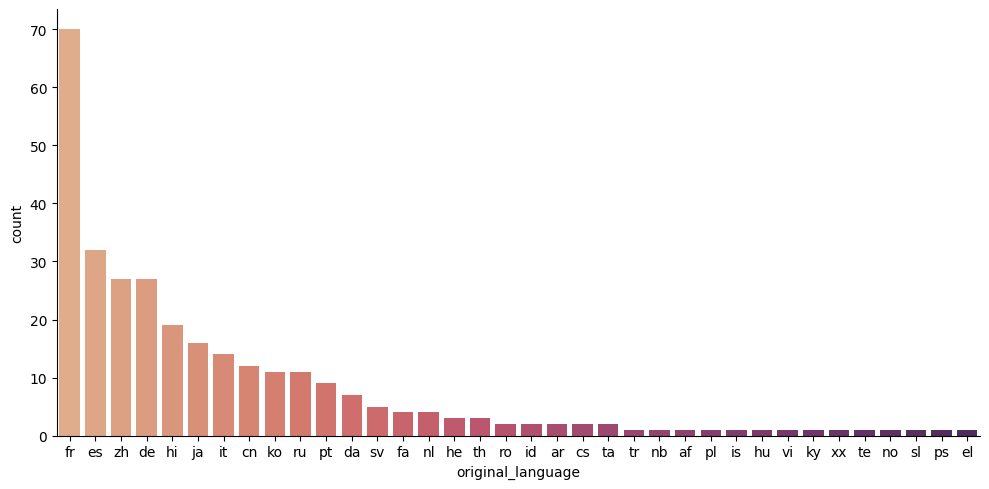

In [105]:
sns.catplot(x='original_language', kind='count', data=tmdb.query('original_language != "en"'), aspect=2, order=Total_idiomas_otras_peliculas.index, palette='flare')

Conclusiones

1.  El idioma ingles es el más predominante
2.   La distribución de los otros idiomas




# Analisis de Películas

In [106]:
peliculas.head(2)

,peliculaId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [107]:
# Calculo del Promedio de las dos primeras películas
notas_toy_story = notas.query('peliculaId==1')
notas_jumanji = notas.query('peliculaId==2')
print(len(notas_toy_story))
print(len(notas_jumanji))
print ('Promedio de Toy Story: %.2f ' % notas_toy_story.nota.mean())
print ('Promedio de Jumanji: %.2f ' % notas_jumanji.nota.mean())

215
110
Promedio de Toy Story: 3.92 
Promedio de Jumanji: 3.43 


In [108]:
# Caluclo de le mediana de las dos primeras películas
print ('La Mediana de Toy Story: %.2f ' % notas_toy_story.nota.median())
print ('La Mediana de Jumanji: %.2f ' % notas_jumanji.nota.median())

La Mediana de Toy Story: 4.00 
La Mediana de Jumanji: 3.50 


Los resultados indican que el 50% de los usuarios evaluario Toy Story por enciama de 4 y el el otro 50% por debajo de 4

In [109]:
 # np.array([2.5]*10) Se crean 10 posiciones con 2.5
import numpy as np
pelicula1= np.append(np.array([2.5]*10), np.array([3.5]*10)) # con "append" se unen los dos array
pelicula2= np.append(np.array([1]*10), np.array([5]*10))

In [110]:
print('Promedio pelicula1: %.2f ' % pelicula1.mean(),'Promedio pelicula2: %.2f ' % pelicula2.mean())
print('Mediana  pelicula1: %.2f ' % np.median(pelicula1),'Mediana pelicula2: %.2f ' % np.median(pelicula2))

Promedio pelicula1: 3.00  Promedio pelicula2: 3.00 
Mediana  pelicula1: 3.00  Mediana pelicula2: 3.00 


Enc onclusión las medidas de tendencia central como la media y la mediana ocualtan demaciada información. no son muy buena para utilizarlas en el analisis de datos.

<ipython-input-111-98afbdc7d25a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pelicula1)
<ipython-input-111-98afbdc7d25a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pelicula2)


<Axes: ylabel='Density'>

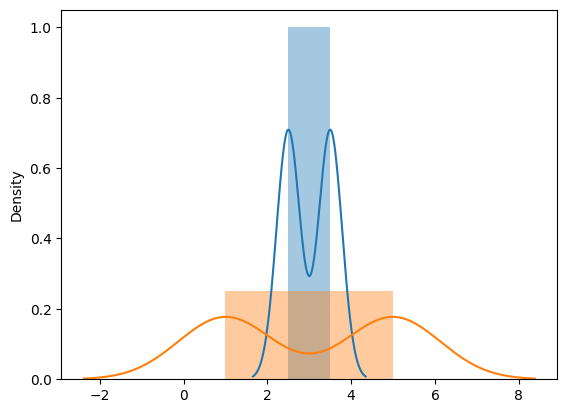

In [111]:
# Analizadmos la distribución de frecuencias
sns.distplot(pelicula1)
sns.distplot(pelicula2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

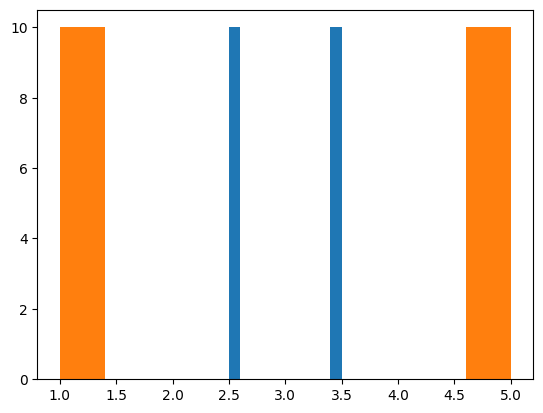

In [112]:
#Tambien podemos usar histogramas para efectos comparativos
plt.hist(pelicula1, bins=10)
plt.hist(pelicula2, bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7cbf41a9b550>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbf41a9ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbf41a9b2b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7cbf41a9bfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cbf41ad02b0>,
 'means': []}

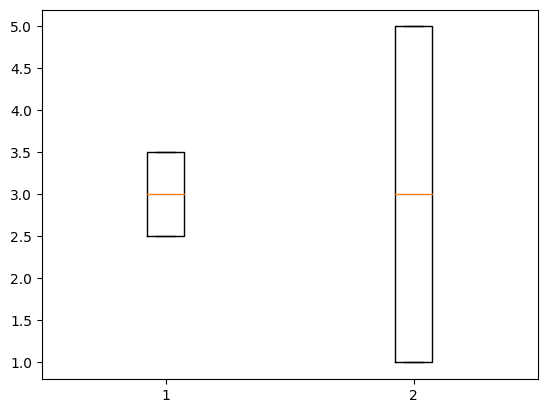

In [113]:
# Podemos usar un gráfico Box Plot
plt.boxplot([pelicula1, pelicula2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cbf41b2b8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbf41b2be20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbf41b2b640>,
 'medians': [<matplotlib.lines.Line2D at 0x7cbf4195c3a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cbf4195c640>,
 'means': []}

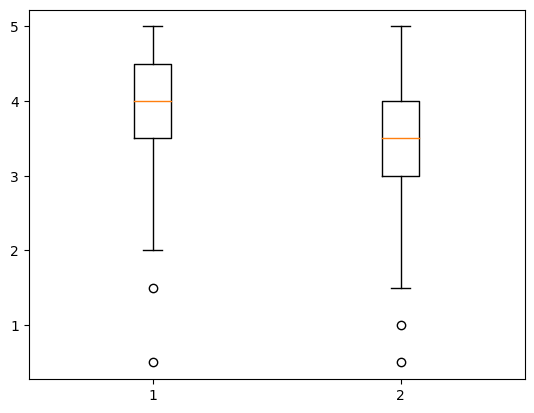

In [114]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='peliculaId', ylabel='nota'>

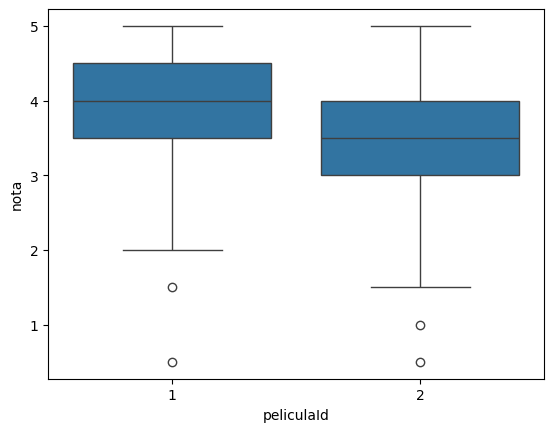

In [115]:
import seaborn as sns
sns.boxplot(x="peliculaId", y = "nota", data= notas.query("peliculaId in (1,2)"))

<ipython-input-116-379200a86986>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="peliculaId", y = "nota",
<ipython-input-116-379200a86986>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(x="peliculaId", y = "nota",
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/

<Axes: xlabel='peliculaId', ylabel='nota'>

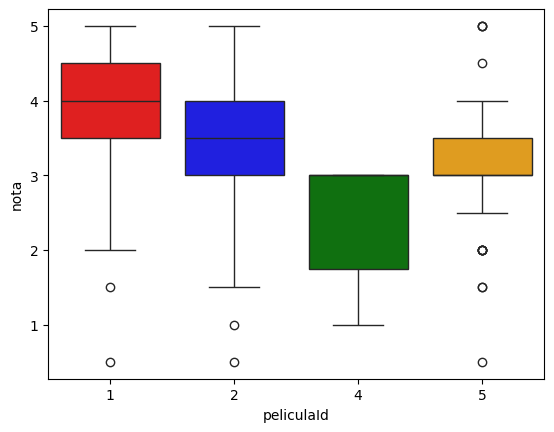

In [116]:
# GRAficamos Boxplot de las pelicuales de 1 a 5
colores = ['red', 'blue', 'green', 'orange', 'purple']
sns.boxplot(x="peliculaId", y = "nota",
            data= notas.query("peliculaId in (1,2,4,4,5)"),palette=colores)

In [121]:
# Calculo de le mediana de las dos primeras películas
print ('La Desviación Estándar de Toy Story: %.2f ' % notas_toy_story.nota.std())
print ('La Desviación Estándar de Jumanji: %.2f ' % notas_jumanji.nota.std())

La Desviación Estándar de Toy Story: 0.83 
La Desviación Estándar de Jumanji: 0.88 


In [120]:
print('Promedio pelicula1: %.2f ' % pelicula1.mean(),'Promedio pelicula2: %.2f ' % pelicula2.mean())
print('Mediana  pelicula1: %.2f ' % np.median(pelicula1),'Mediana pelicula2: %.2f ' % np.median(pelicula2))
print('Desviación Estándar  pelicula1: %.2f ' % np.std(pelicula1),'Desviación Estándar pelicula2: %.2f ' % np.std(pelicula2))

Promedio pelicula1: 3.00  Promedio pelicula2: 3.00 
Mediana  pelicula1: 3.00  Mediana pelicula2: 3.00 
Desviación Estándar  pelicula1: 0.50  Desviación Estándar pelicula2: 2.00 


Una desviación estándar baja representa que la mayor parte de los datos de una muestra se encuentran próximos a la media, mientras que una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplio.

# **Lo que aprendimos**





*  Comparar la media de las peliculas.
*  Juntar arrays con np.append().
*  El concepto y ejemplos prácticos de dispersión de datos.
*  Desviación estándar.

Fuentes de Datos:


*   Google Data Search
*   Kaggle








